훈련(Train), 검증(Validation), 테스트(Test) 세 가지로 분할

train_test_split 함수는 데이터를 랜덤하게 분할합니다.

전체 데이터에서 80%는 훈련 및 검증 데이터로 사용되고, 20%는 테스트 데이터로 분할합니다.
    
훈련 및 검증 데이터는 다시 80% 훈련 데이터, 20% 검증 데이터로 나누어집니다.
    
random_state=42는 재현 가능성을 위해 설정한 시드 값입니다.

# 데이터 생성 사례

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 예제 데이터 생성
data = {
    'Feature1': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 1. 훈련 데이터와 테스트 데이터를 80:20으로 분할
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# 2. 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 80:20 분할
train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)

# 분할 결과 출력
print("훈련 데이터:")
print(train_data)
print("\n검증 데이터:")
print(validation_data)
print("\n테스트 데이터:")
print(test_data)


훈련 데이터:
   Feature1  Feature2  Target
5        55        60       1
6        65        70       0
7        75        80       1
9        95       100       1
2        25        30       0
3        35        40       1

검증 데이터:
   Feature1  Feature2  Target
0         5        10       0
4        45        50       0

테스트 데이터:
   Feature1  Feature2  Target
8        85        90       0
1        15        20       1


# 삼성전자의 일별 주가 데이터

In [ ]:
# 코드 설명
# 데이터 수집: FinanceDataReader 라이브러리를 사용하여 삼성전자의 주가 데이터를 2020년 1월 1일부터 2024년 11월 14일까지 불러옵니다.

# 데이터 정렬: 주가 데이터는 날짜를 기준으로 정렬되어 있으므로, Date 열을 추가하고 이를 기준으로 정렬합니다.

# 데이터 분할: train_test_split 함수를 사용하여 데이터를 분할합니다. 여기서는 시간 순서를 유지하기 위해 shuffle=False로 설정하였습니다.

# 분할 비율: 전체 데이터의 70%를 훈련 데이터로 사용하고, 나머지 30%를 테스트 데이터로 사용합니다. 훈련 데이터의 20%를 검증 데이터로 분할하여 최종적으로 훈련 데이터 56%, 검증 데이터 14%, 테스트 데이터 30%의 비율로 분할됩니다.

# 이러한 방식으로 주가 데이터를 효과적으로 분할하여 모델 학습과 평가에 활용할 수 있습니다.

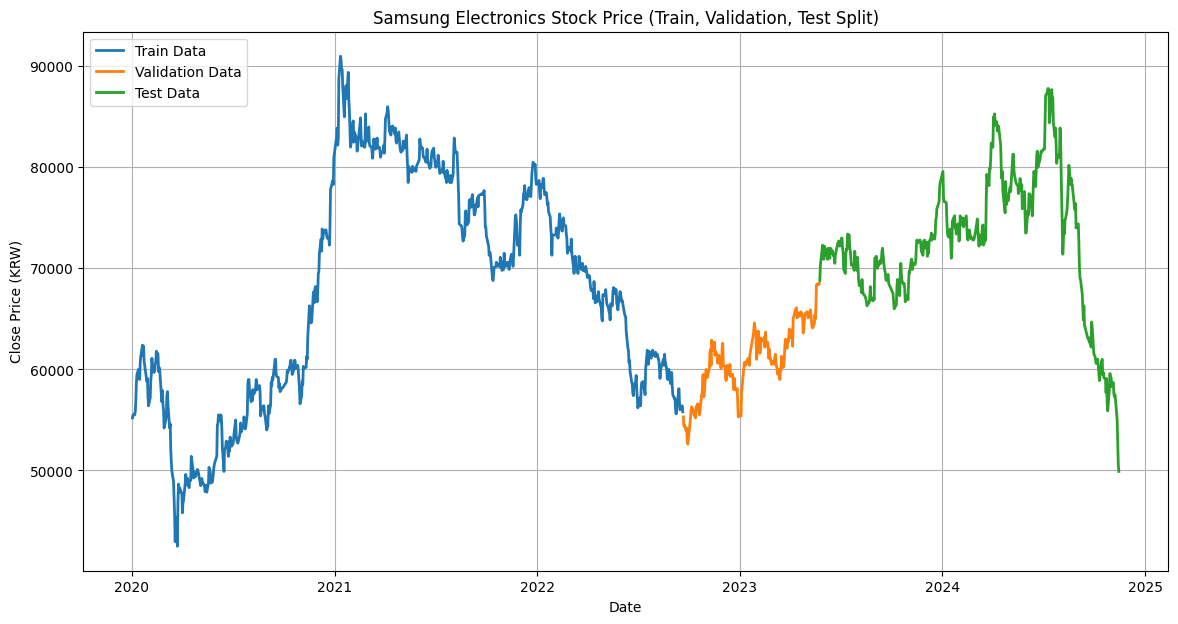

In [4]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. 삼성전자 주가 데이터 가져오기
df = fdr.DataReader('005930', '2020-01-01')

# 2. 인덱스를 리셋하여 'Date' 열로 변환
df = df.reset_index()

# 3. 'Date' 열을 기준으로 정렬
df = df.sort_values(by='Date')

# 4. 데이터 분할 (시간 순서 유지)
train_data, test_data = train_test_split(df, test_size=0.3, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=False)

# 5. 시각화
plt.figure(figsize=(14, 7))
plt.plot(train_data['Date'], train_data['Close'], label='Train Data', linewidth=2)
plt.plot(val_data['Date'], val_data['Close'], label='Validation Data', linewidth=2)
plt.plot(test_data['Date'], test_data['Close'], label='Test Data', linewidth=2)

# 그래프 설정
plt.title('Samsung Electronics Stock Price (Train, Validation, Test Split)')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.grid()
plt.show()
